Defines the URL of a dataset and loads it into a pandas DataFrame named `data` using `pd.read_csv()`.

In [ ]:
#Dataset
url = "https://raw.githubusercontent.com/Adrita-Khan/AstroPhotoZ/main/Datasets/SDSS/star_classification.csv"

#Load the Dataset
data = pd.read_csv(url)

Installs the Python libraries `pandas`, `numpy`, `matplotlib`, `seaborn`, and `scikit-learn` using pip for data manipulation, numerical computations, data visualization, and machine learning.

In [1]:
pip install pandas numpy matplotlib seaborn scikit-learn

This code performs redshift prediction for galaxies using a linear regression model.

1. **Step 1-3**: Import libraries and load galaxy dataset from a remote CSV file.
2. **Step 4**: Filter dataset for rows where the astronomical object class is "GALAXY."
3. **Step 5**: Create additional color features based on magnitude differences (`u-g`, `g-r`, `r-i`, `i-z`).
4. **Step 6**: Select color features and `redshift` as target variable.
5. **Step 7**: Handle missing data by removing rows with `NaN` values.
6. **Step 8**: Split the dataset into training and testing subsets.
7. **Step 9**: Train a linear regression model on training data.
8. **Step 10**: Predict redshift values for the test set.
9. **Step 11**: Evaluate the model using Mean Squared Error (MSE) and R-squared metrics.
10. **Step 12**: Visualize the actual vs predicted redshift values.

<ipython-input-2-650a4cfabf26>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  galaxies['u-g'] = galaxies['u'] - galaxies['g']
<ipython-input-2-650a4cfabf26>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  galaxies['g-r'] = galaxies['g'] - galaxies['r']
<ipython-input-2-650a4cfabf26>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

Mean Squared Error: 0.01873773396454348
R-squared Score: 0.7266930307405864


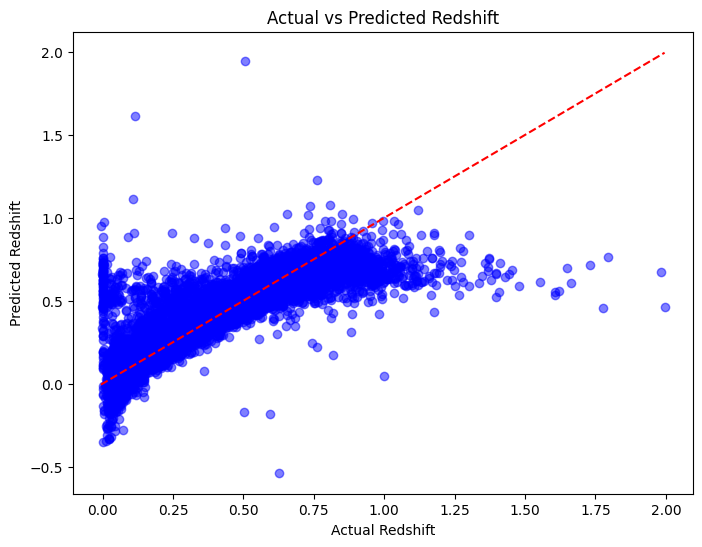

In [2]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Define the Raw URL of the Dataset
url = "https://raw.githubusercontent.com/Adrita-Khan/AstroPhotoZ/main/Datasets/SDSS/star_classification.csv"

# Step 3: Load the Dataset
data = pd.read_csv(url)

# Step 4: Filter Data for Galaxies
galaxies = data[data['class'] == 'GALAXY']

# Step 5: Create Color Features
galaxies['u-g'] = galaxies['u'] - galaxies['g']
galaxies['g-r'] = galaxies['g'] - galaxies['r']
galaxies['r-i'] = galaxies['r'] - galaxies['i']
galaxies['i-z'] = galaxies['i'] - galaxies['z']

# Step 6: Select Features and Target
features = ['u', 'g', 'r', 'i', 'z', 'u-g', 'g-r', 'r-i', 'i-z']
X = galaxies[features]
y = galaxies['redshift']

# Step 7: Handle Missing Values (if any)
X = X.dropna()
y = y.loc[X.index]

# Step 8: Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Initialize and Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 10: Predict on the Test Set
y_pred = model.predict(X_test)

# Step 11: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared Score: {r2}')

# Step 12: Plot the Results
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel("Actual Redshift")
plt.ylabel("Predicted Redshift")
plt.title("Actual vs Predicted Redshift")
plt.show()


The following code compares the performance of multiple regression models on a given dataset, from preprocessing to evaluation.

1. **Step 1**: Import necessary libraries for data processing, machine learning, and evaluation.
2. **Step 2-3**: Load the dataset and ensure the target column (`redshift`) exists.
3. **Step 4**: Preprocess the data:
   - Scale numerical features with `StandardScaler`.
   - Apply one-hot encoding to categorical features with `OneHotEncoder`.
   - Combine preprocessing steps with `ColumnTransformer`.
4. **Step 5**: Split the dataset into training and testing sets.
5. **Step 6**: Define pipelines for each regression model, integrating preprocessing and model training.
6. **Step 7**: Train each model, make predictions, and evaluate using metrics like MAE, MSE, RMSE, and R².
7. **Step 8**: Summarize model performance in a comparison table for analysis.

The models used in this code are:

1. **Linear Regression**  
2. **Random Forest Regressor**  
3. **Gradient Boosting Regressor**  
4. **Support Vector Regressor (SVR)**  
5. **K-Nearest Neighbors Regressor (KNN)**  
6. **Neural Network Regressor (MLP Regressor)**

In [1]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Step 2: Define the Raw URL of the Dataset
url = "https://raw.githubusercontent.com/Adrita-Khan/AstroPhotoZ/main/Datasets/SDSS/star_classification.csv"

# Step 3: Load the Dataset
data = pd.read_csv(url)

# Assuming 'redshift' is the target variable
# If the target variable has a different name, replace 'redshift' accordingly
# For example, it could be 'z' or something else
target_column = 'redshift'  # Replace with actual target column name

if target_column not in data.columns:
    raise ValueError(f"Target column '{target_column}' not found in the dataset.")

# Step 4: Data Preprocessing

# Separating features and target
X = data.drop(columns=[target_column])
y = data[target_column]

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Define preprocessing for numerical data: scaling
numerical_transformer = StandardScaler()

# Define preprocessing for categorical data: one-hot encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Step 5: Split the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Step 6: Define the Machine Learning Pipelines for Each Model

# Dictionary to store models and their names
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

# Dictionary to store model performances
model_performance = {}

# Step 7: Train and Evaluate Each Model
for name, model in models.items():
    # Create a pipeline that first preprocesses the data and then fits the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    model_performance[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2 Score': r2
    }

    print(f"\n{name} Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

# Step 8: Compare Model Performances

# Convert the performance dictionary to a DataFrame for better visualization
performance_df = pd.DataFrame(model_performance).T
print("\nModel Performance Comparison:")
print(performance_df)



Linear Regression Performance:
Mean Absolute Error (MAE): 0.2214
Mean Squared Error (MSE): 0.1686
Root Mean Squared Error (RMSE): 0.4106
R² Score: 0.6812

Random Forest Performance:
Mean Absolute Error (MAE): 0.1250
Mean Squared Error (MSE): 0.1134
Root Mean Squared Error (RMSE): 0.3368
R² Score: 0.7855

Gradient Boosting Performance:
Mean Absolute Error (MAE): 0.1597
Mean Squared Error (MSE): 0.1324
Root Mean Squared Error (RMSE): 0.3639
R² Score: 0.7496

Support Vector Regressor Performance:
Mean Absolute Error (MAE): 0.1653
Mean Squared Error (MSE): 0.1487
Root Mean Squared Error (RMSE): 0.3856
R² Score: 0.7188

K-Nearest Neighbors Performance:
Mean Absolute Error (MAE): 0.1791
Mean Squared Error (MSE): 0.1758
Root Mean Squared Error (RMSE): 0.4193
R² Score: 0.6676

Neural Network Performance:
Mean Absolute Error (MAE): 0.1707
Mean Squared Error (MSE): 0.1416
Root Mean Squared Error (RMSE): 0.3763
R² Score: 0.7322

Model Performance Comparison:
                               MAE   

The following code includes the full workflow for comparing multiple regression models for predicting `redshift`. Here are the key highlights:

### New Additions/Enhancements:
1. **Data Exploration**:
   - Print first 5 rows, dataset info, statistical summary, and missing value checks for better understanding of the data.

2. **Data Preprocessing**:
   - Identifies numerical and categorical columns dynamically.
   - Ensures missing values are handled properly, with scaling and encoding integrated via `ColumnTransformer`.

3. **Model Evaluation**:
   - Evaluates models on:
     - **MAE (Mean Absolute Error)**
     - **MSE (Mean Squared Error)**
     - **RMSE (Root Mean Squared Error)**
     - **R² Score**
   - Stores performance metrics in a dictionary for easy comparison.

4. **Performance Visualization**:
   - **Bar plot** to compare models based on RMSE.
   - Identifies and selects the best-performing model (lowest RMSE).

5. **Best Model Analysis**:
   - Retrains the best model.
   - **Actual vs Predicted Plot** to visualize its performance on test data.

### Outputs:
- Exploratory summaries and data insights.
- Detailed performance metrics for each model.
- Visual comparison of models and their effectiveness.



First 5 rows of the dataset:
         obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354  

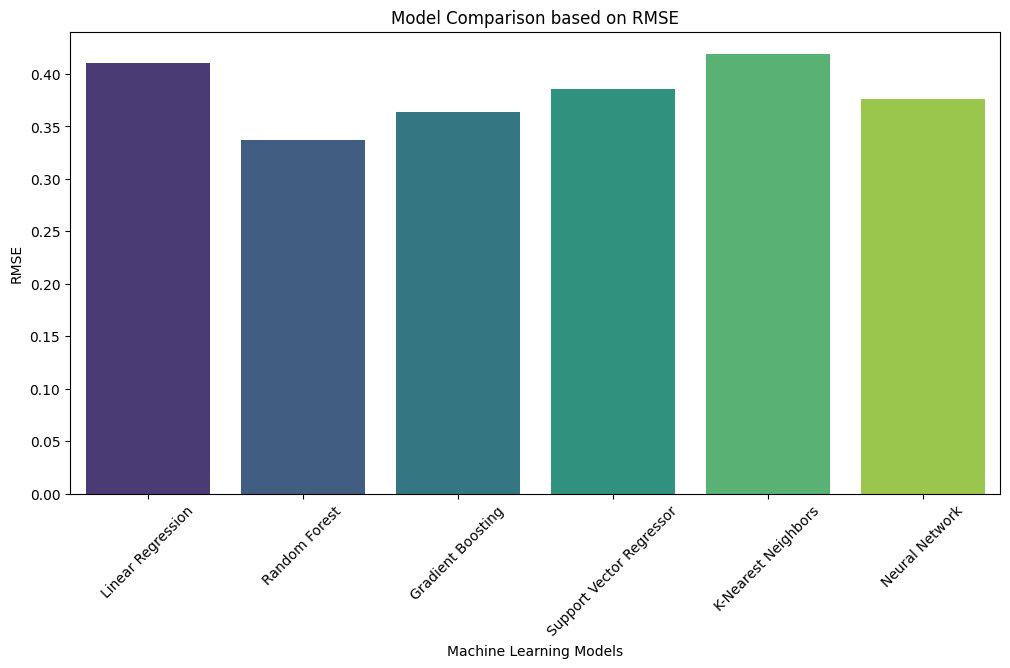


Best Model based on RMSE: Random Forest


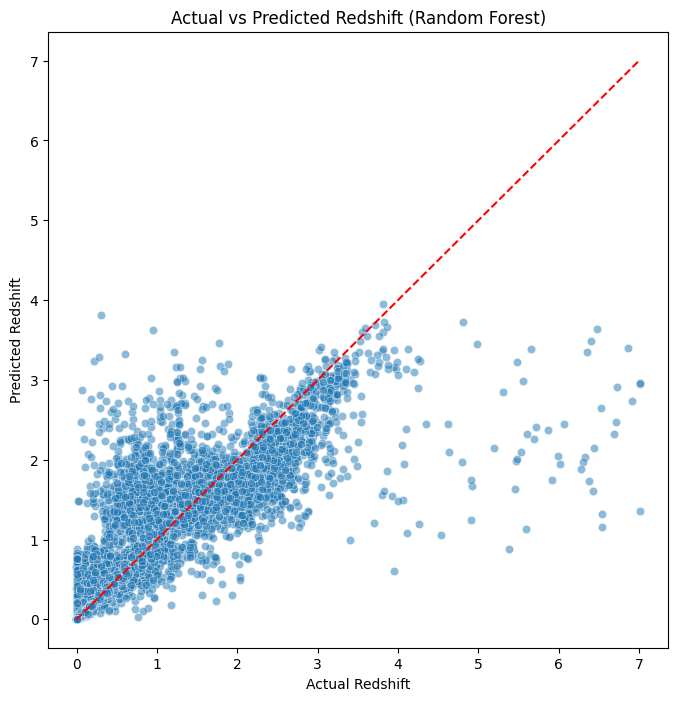

In [2]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

# Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Step 2: Define the Raw URL of the Dataset
url = "https://raw.githubusercontent.com/Adrita-Khan/AstroPhotoZ/main/Datasets/SDSS/star_classification.csv"

# Step 3: Load the Dataset
data = pd.read_csv(url)

# Step 4: Data Exploration
print("First 5 rows of the dataset:")
print(data.head())

print("\nDataset Information:")
print(data.info())

print("\nStatistical Summary:")
print(data.describe())

print("\nChecking for missing values:")
print(data.isnull().sum())

# Assuming 'redshift' is the target variable
# If the target variable has a different name, replace 'redshift' accordingly
# For example, it could be 'z' or something else
target_column = 'redshift'  # Replace with actual target column name

if target_column not in data.columns:
    raise ValueError(f"Target column '{target_column}' not found in the dataset.")

# Step 5: Data Preprocessing

# Separating features and target
X = data.drop(columns=[target_column])
y = data[target_column]

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\nNumerical Columns: {numerical_cols}")
print(f"Categorical Columns: {categorical_cols}")

# Define preprocessing for numerical data: scaling
numerical_transformer = StandardScaler()

# Define preprocessing for categorical data: one-hot encoding
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Step 6: Split the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

# Step 7: Define the Machine Learning Pipelines for Each Model

# Dictionary to store models and their names
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

# Dictionary to store model performances
model_performance = {}

# Step 8: Train and Evaluate Each Model
for name, model in models.items():
    # Create a pipeline that first preprocesses the data and then fits the model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store the results
    model_performance[name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2 Score': r2
    }

    print(f"\n{name} Performance:")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R² Score: {r2:.4f}")

# Step 9: Compare Model Performances

# Convert the performance dictionary to a DataFrame for better visualization
performance_df = pd.DataFrame(model_performance).T
print("\nModel Performance Comparison:")
print(performance_df)

# Optional: Plot the performances
plt.figure(figsize=(12, 6))
sns.barplot(x=performance_df.index, y='RMSE', data=performance_df, palette='viridis')
plt.title('Model Comparison based on RMSE')
plt.ylabel('RMSE')
plt.xlabel('Machine Learning Models')
plt.xticks(rotation=45)
plt.show()

# Optional: Plot Actual vs Predicted for the best model (based on RMSE)
best_model_name = performance_df['RMSE'].idxmin()
print(f"\nBest Model based on RMSE: {best_model_name}")

# Retrain the best model to get predictions for plotting
best_model = models[best_model_name]
best_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', best_model)
])
best_pipeline.fit(X_train, y_train)
y_best_pred = best_pipeline.predict(X_test)

# Plotting Actual vs Predicted
plt.figure(figsize=(8, 8))
sns.scatterplot(x=y_test, y=y_best_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Redshift')
plt.ylabel('Predicted Redshift')
plt.title(f'Actual vs Predicted Redshift ({best_model_name})')
plt.show()
